## Importing Necessary Libs

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,SIRA_NO,fQRS_var_yok,AKS_tip,stemı_yeri,antiplatelet_tipi,yaş,EF,NT_proBNP,trop_24,bilirubin_total,...,sol_intra_atrial,diyastolik_fonk,boy,kilo,p_max,p_min,p_disp,QRS_süre,QT,QTc
0,511,1.0,2.0,2.0,1.0,51.0,45.0,301.0,99.00,0.50,...,NaN,NaN,1.75,89.0,120.0,60.0,60.0,90.0,360.0,440.0
1,629,0.0,2.0,2.0,1.0,57.0,NaN,1680.0,27.66,0.45,...,NaN,NaN,1.58,71.0,120.0,70.0,50.0,94.0,394.0,425.0
2,56,0.0,2.0,1.0,1.0,51.0,48.0,2375.0,97.78,0.85,...,10.0,NaN,1.76,84.0,110.0,75.0,35.0,96.0,398.0,410.0
3,80,0.0,2.0,2.0,3.0,56.0,60.0,2327.0,28.31,1.72,...,NaN,NaN,1.78,104.0,110.0,70.0,40.0,141.0,400.0,442.0
4,338,0.0,1.0,NaN,3.0,32.0,57.0,238.0,1.37,0.44,...,NaN,NaN,1.80,95.0,100.0,70.0,30.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1536,NaN,2.0,1.0,NaN,54.0,NaN,NaN,39254.40,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,1537,NaN,2.0,2.0,NaN,53.0,NaN,NaN,3096.80,0.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,1538,NaN,1.0,NaN,NaN,83.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,1539,NaN,2.0,1.0,NaN,46.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding Corralation

#### Created new dataset named 'droppedThreshold' 

Beacuse use values only that has high corralation and we should old dataset for future operations

In [5]:
droppedThreshold = df.copy()

In [6]:
threshold = 0.09

for i in droppedThreshold:
    if -threshold < droppedThreshold[i].corr(droppedThreshold["fQRS_var_yok"]) and droppedThreshold[i].corr(droppedThreshold["fQRS_var_yok"]) < threshold:
        droppedThreshold.drop([i], axis=1, inplace=True)


In [7]:
corr = droppedThreshold.corr()

In [8]:
corr

,SIRA_NO,fQRS_var_yok,EF,NT_proBNP,BMI,DSÇ,DM,previous_CAD,sol_atrium,a,des_zamanı,sol_intra_atrial,diyastolik_fonk
SIRA_NO,1.000000,-0.123842,-0.007105,0.076201,0.040234,0.079776,-0.038335,0.554032,0.072499,0.170318,0.248662,-0.168617,NaN
fQRS_var_yok,-0.123842,1.000000,-0.117061,0.097057,0.090533,0.160045,-0.095991,-0.118554,0.101810,-0.109507,-0.149343,0.108218,NaN
EF,-0.007105,-0.117061,1.000000,-0.244607,-0.009927,-0.294968,0.036217,-0.032851,-0.148548,0.141458,0.216909,-0.187097,NaN
NT_proBNP,0.076201,0.097057,-0.244607,1.000000,-0.046636,0.129375,-0.115513,0.026271,0.251131,0.088155,-0.050419,0.035168,NaN
BMI,0.040234,0.090533,-0.009927,-0.046636,1.000000,0.267690,-0.058429,0.037474,0.181112,0.031269,-0.074672,0.169926,NaN
DSÇ,0.079776,0.160045,-0.294968,0.129375,0.267690,1.000000,-0.052648,-0.103641,0.377862,-0.030767,-0.082810,0.198113,NaN
DM,-0.038335,-0.095991,0.036217,-0.115513,-0.058429,-0.052648,1.000000,0.034442,-0.091550,-0.171955,-0.039387,0.038857,NaN
previous_CAD,0.554032,-0.118554,-0.032851,0.026271,0.037474,-0.103641,0.034442,1.000000,-0.003479,0.096375,0.156819,0.171431,NaN
sol_atrium,0.072499,0.101810,-0.148548,0.251131,0.181112,0.377862,-0.091550,-0.003479,1.000000,0.120361,-0.037934,0.044637,NaN
a,0.170318,-0.109507,0.141458,0.088155,0.031269,-0.030767,-0.171955,0.096375,0.120361,1.000000,0.158726,0.054013,NaN


In [9]:
corr_dict = corr['fQRS_var_yok'].to_dict()

In [10]:
del corr_dict['fQRS_var_yok']
del corr_dict['SIRA_NO']

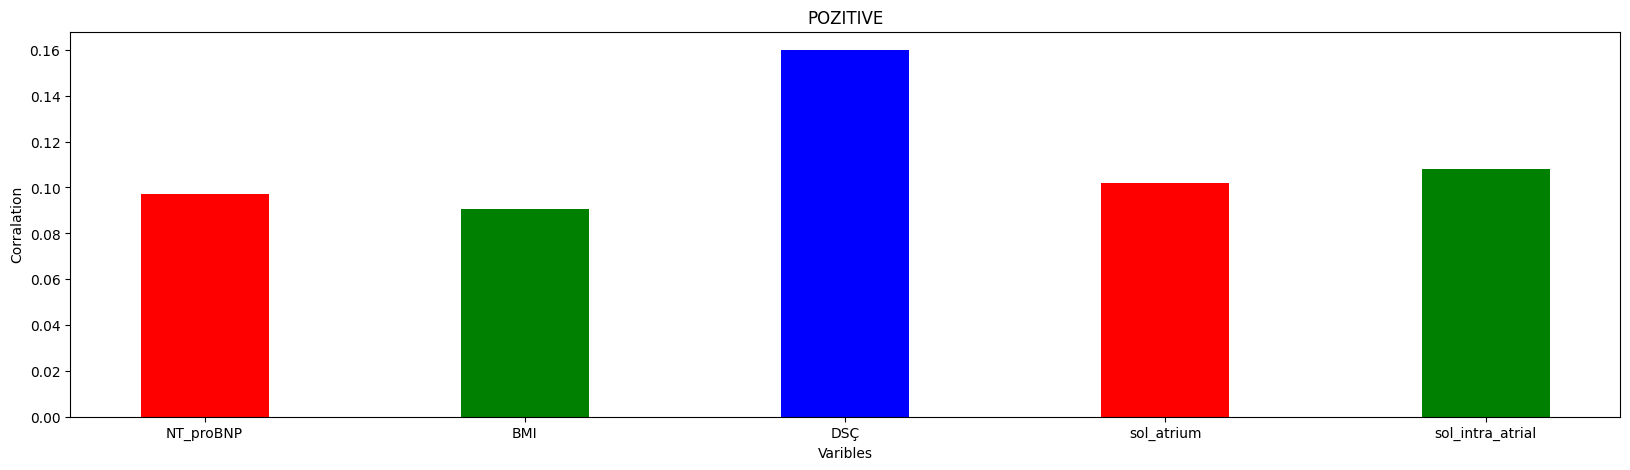

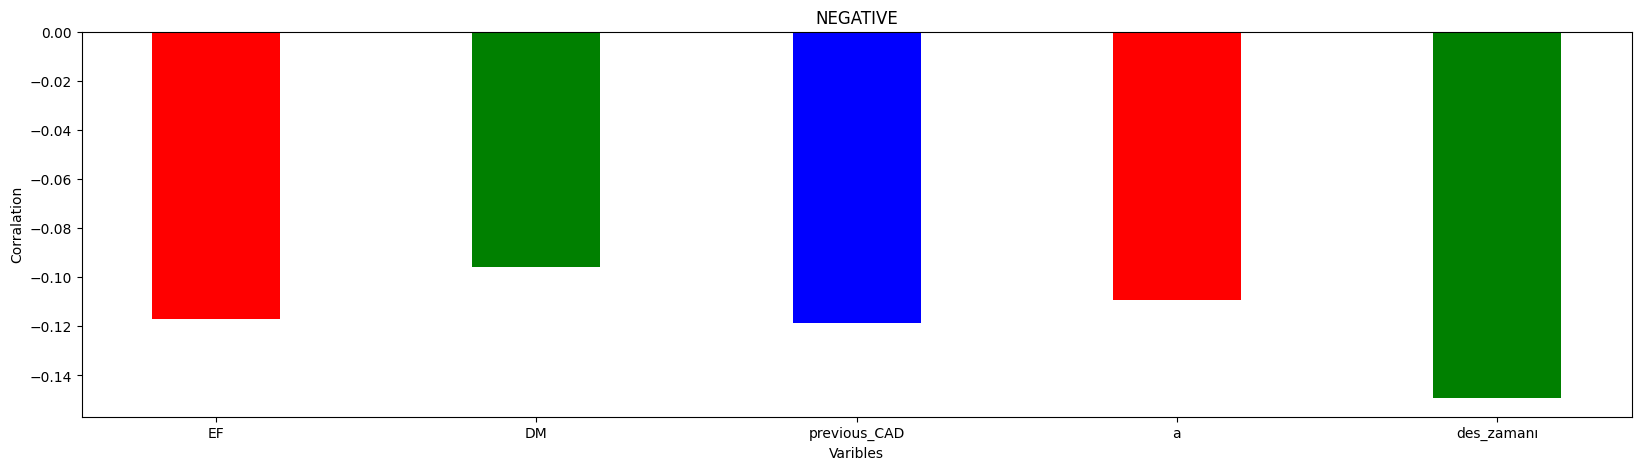

In [11]:
def plot_histogram(data, title, X_title = "Varibles", y_title = "Corralation"):
    courses = list(data.keys())
    values = list(data.values())
    #values = list(map(abs, data.values()))

    fig = plt.figure(figsize=(20, 5))

    # creating the bar plot
    plt.bar(courses, values, color=[ 'red', 'green', 'blue', ],
            width=0.4)

    plt.xlabel(X_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.show()

# POZITIVE CORRELATIONS
pozitive_data = dict((k, v) for k, v in corr_dict.items() if v > 0)
plot_histogram(pozitive_data, "POZITIVE")

negative_data = dict((k, v) for k, v in corr_dict.items() if v < 0)
plot_histogram(negative_data,"NEGATIVE")

In [12]:
droppedThreshold

,SIRA_NO,fQRS_var_yok,EF,NT_proBNP,BMI,DSÇ,DM,previous_CAD,sol_atrium,a,des_zamanı,sol_intra_atrial,diyastolik_fonk
0,511,1.0,45.0,301.0,NaN,5.5,2.0,1.0,3.9,NaN,NaN,NaN,NaN
1,629,0.0,NaN,1680.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2,56,0.0,48.0,2375.0,27.117769,4.5,2.0,0.0,3.4,59.0,183.0,10.0,NaN
3,80,0.0,60.0,2327.0,32.824138,NaN,2.0,0.0,4.0,NaN,NaN,NaN,NaN
4,338,0.0,57.0,238.0,29.320988,NaN,2.0,0.0,3.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1536,NaN,NaN,NaN,19.377163,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1536,1537,NaN,NaN,NaN,31.561672,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
1537,1538,NaN,NaN,NaN,44.444444,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1538,1539,NaN,NaN,NaN,25.142857,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN


## Data handling and Losing Empty Values

In [13]:
droppedThreshold['BMI'] =  df.kilo/ (df.boy**2)
droppedThreshold = droppedThreshold[droppedThreshold['fQRS_var_yok'].notna()]

In [14]:
droppedThreshold['fQRS_var_yok'].isna().sum()

0

In [15]:
droppedThreshold['BMI'].isna().sum()

28

In [16]:
for i in droppedThreshold:
    droppedThreshold[i].replace([np.nan], (droppedThreshold[i].median()), inplace=True)

In [17]:
droppedThreshold.isna().sum()

SIRA_NO               0
fQRS_var_yok          0
EF                    0
NT_proBNP             0
BMI                   0
DSÇ                   0
DM                    0
previous_CAD          0
sol_atrium            0
a                     0
des_zamanı            0
sol_intra_atrial      0
diyastolik_fonk     842
dtype: int64

In [18]:
droppedThreshold.drop('diyastolik_fonk', axis = 1, inplace =True)
droppedThreshold.drop('SIRA_NO', axis = 1, inplace =True)

## Model Training

In [19]:
X = droppedThreshold.drop('fQRS_var_yok', axis = 1)
y = droppedThreshold['fQRS_var_yok']

### 1.Support Vector Classification

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)  

0.6205533596837944

### 2. Logistic Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [24]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)  

0.6363636363636364

### 3. Desicion Tree

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)  

0.5810276679841897

## 4. Random Forest

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)  

0.6284584980237155

## 5. K-Nearest Neighbour (KNN)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [33]:
neigbours = [3,5,7,9,11,13,15,19,25]
scores = {}
for i in neigbours:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    scores[i] = accuracy_score(y_test, prediction)  
    

In [34]:
scores

{3: 0.5652173913043478,
 5: 0.5849802371541502,
 7: 0.6126482213438735,
 9: 0.6086956521739131,
 11: 0.6086956521739131,
 13: 0.6126482213438735,
 15: 0.616600790513834,
 19: 0.6245059288537549,
 25: 0.6245059288537549}

## 6. Naive Bayes


In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)  

0.6205533596837944

## K-Fold 

In [37]:
X = droppedThreshold.drop('fQRS_var_yok', axis = 1)
y = droppedThreshold['fQRS_var_yok']

cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [38]:
scores_svc = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_reg = cross_val_score(reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_dtc = cross_val_score(dtc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_rfc = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_gnb = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


scores_all = pd.DataFrame()

scores_all['Support Vector Classification'] = scores_svc
scores_all['Logistic Regression'] = scores_reg
scores_all['Desicion Tree'] = scores_dtc
scores_all['Random Forest'] = scores_rfc
scores_all['Naive Bayes'] = scores_gnb



In [40]:
neigbours = [3,5,7,9,11,13,15,19,25]
scores = {}
for i in neigbours:
    knn = KNeighborsClassifier(n_neighbors= i)
    scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores_all[f'KNN {i}'] = scores

In [41]:
scores_all

,Support Vector Classification,Logistic Regression,Desicion Tree,Random Forest,Naive Bayes,KNN 3,KNN 5,KNN 7,KNN 9,KNN 11,KNN 13,KNN 15,KNN 19,KNN 25
0,0.658824,0.647059,0.600000,0.635294,0.611765,0.588235,0.611765,0.682353,0.682353,0.682353,0.658824,0.670588,0.647059,0.647059
1,0.658824,0.588235,0.482353,0.541176,0.670588,0.517647,0.576471,0.635294,0.588235,0.576471,0.576471,0.576471,0.552941,0.600000
2,0.559524,0.559524,0.559524,0.607143,0.630952,0.523810,0.523810,0.547619,0.511905,0.583333,0.559524,0.607143,0.583333,0.571429
3,0.642857,0.690476,0.571429,0.607143,0.642857,0.571429,0.595238,0.583333,0.571429,0.583333,0.583333,0.583333,0.535714,0.547619
4,0.571429,0.666667,0.607143,0.571429,0.607143,0.440476,0.488095,0.547619,0.607143,0.571429,0.547619,0.547619,0.511905,0.535714
5,0.642857,0.666667,0.488095,0.642857,0.630952,0.642857,0.666667,0.726190,0.690476,0.690476,0.678571,0.642857,0.654762,0.630952
6,0.654762,0.654762,0.511905,0.619048,0.619048,0.547619,0.571429,0.619048,0.678571,0.642857,0.666667,0.690476,0.654762,0.642857
7,0.607143,0.678571,0.488095,0.630952,0.607143,0.500000,0.547619,0.559524,0.607143,0.619048,0.595238,0.559524,0.630952,0.630952
8,0.607143,0.642857,0.488095,0.642857,0.630952,0.583333,0.630952,0.595238,0.559524,0.571429,0.571429,0.559524,0.559524,0.547619
9,0.690476,0.714286,0.607143,0.642857,0.678571,0.642857,0.678571,0.666667,0.690476,0.666667,0.642857,0.595238,0.547619,0.547619


In [42]:
def _color_red_or_green(val):
    color = 'red' if val < 0.6 else 'green'
    return 'background-color: %s' % color

In [43]:
scores_all.style.applymap(_color_red_or_green)

,Support Vector Classification,Logistic Regression,Desicion Tree,Random Forest,Naive Bayes,KNN 3,KNN 5,KNN 7,KNN 9,KNN 11,KNN 13,KNN 15,KNN 19,KNN 25
0,0.658824,0.647059,0.600000,0.635294,0.611765,0.588235,0.611765,0.682353,0.682353,0.682353,0.658824,0.670588,0.647059,0.647059
1,0.658824,0.588235,0.482353,0.541176,0.670588,0.517647,0.576471,0.635294,0.588235,0.576471,0.576471,0.576471,0.552941,0.600000
2,0.559524,0.559524,0.559524,0.607143,0.630952,0.523810,0.523810,0.547619,0.511905,0.583333,0.559524,0.607143,0.583333,0.571429
3,0.642857,0.690476,0.571429,0.607143,0.642857,0.571429,0.595238,0.583333,0.571429,0.583333,0.583333,0.583333,0.535714,0.547619
4,0.571429,0.666667,0.607143,0.571429,0.607143,0.440476,0.488095,0.547619,0.607143,0.571429,0.547619,0.547619,0.511905,0.535714
5,0.642857,0.666667,0.488095,0.642857,0.630952,0.642857,0.666667,0.726190,0.690476,0.690476,0.678571,0.642857,0.654762,0.630952
6,0.654762,0.654762,0.511905,0.619048,0.619048,0.547619,0.571429,0.619048,0.678571,0.642857,0.666667,0.690476,0.654762,0.642857
7,0.607143,0.678571,0.488095,0.630952,0.607143,0.500000,0.547619,0.559524,0.607143,0.619048,0.595238,0.559524,0.630952,0.630952
8,0.607143,0.642857,0.488095,0.642857,0.630952,0.583333,0.630952,0.595238,0.559524,0.571429,0.571429,0.559524,0.559524,0.547619
9,0.690476,0.714286,0.607143,0.642857,0.678571,0.642857,0.678571,0.666667,0.690476,0.666667,0.642857,0.595238,0.547619,0.547619


In [44]:
scores_dict = {}
for i in scores_all:
    scores_dict[i] = scores_all[i].mean()

In [45]:
scores_dict

{'Support Vector Classification': 0.6293837535014005,
 'Logistic Regression': 0.6509103641456584,
 'Desicion Tree': 0.5403781512605041,
 'Random Forest': 0.6140756302521009,
 'Naive Bayes': 0.6329971988795519,
 'KNN 3': 0.555826330532213,
 'KNN 5': 0.5890616246498599,
 'KNN 7': 0.6162885154061625,
 'KNN 9': 0.6187254901960784,
 'KNN 11': 0.6187394957983193,
 'KNN 13': 0.6080532212885154,
 'KNN 15': 0.6032773109243698,
 'KNN 19': 0.5878571428571429,
 'KNN 25': 0.5901820728291316}

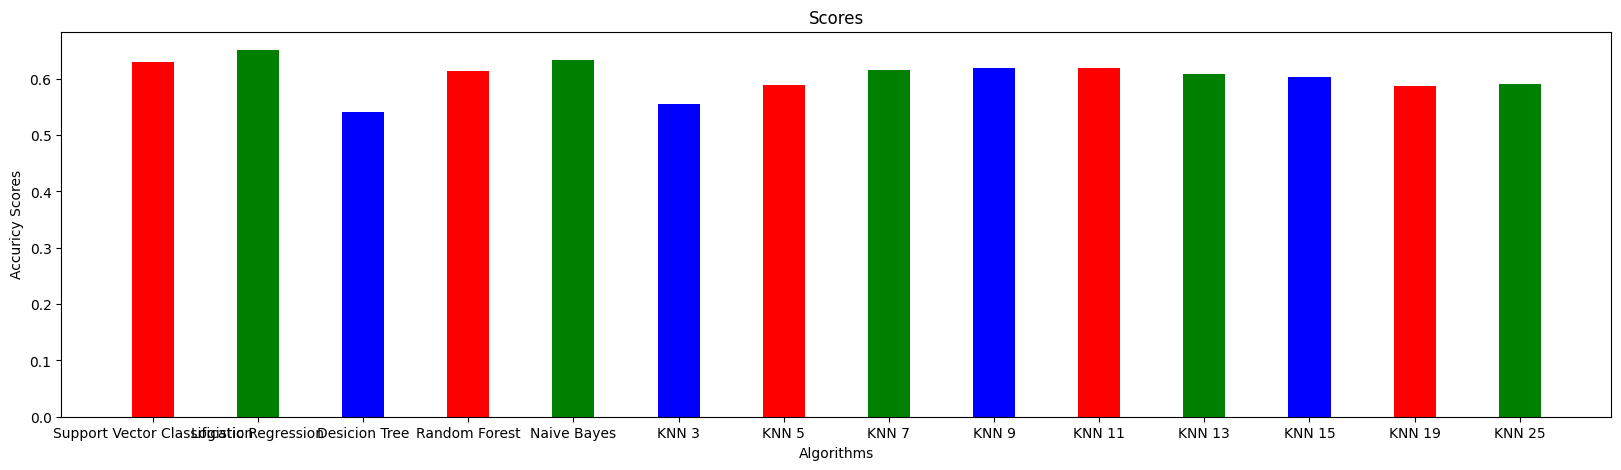

In [46]:
plot_histogram(scores_dict, 'Scores', 'Algorithms', 'Accuricy Scores')